## 📐 Problem 2: $$ \int_{-\infty}^{\infty} \frac{1}{\sqrt{2\pi}} e^{-x^2/2} \, dx = 1 $$

This is the integral of the **standard normal probability density function (PDF)** over the entire real line.  
Its exact value is **1**—a cornerstone of probability theory.

Since numerical integration requires **finite limits**, we truncate to $[-L, L]$.  
Because the standard normal PDF decays as $ e^{-x^2/2} $, we choose $ L = 10 $.  
At $ |x| = 10 $, the function value is $ \sim 7.7 \times 10^{-23} $, and the tail area is **far below machine precision**.

We’ll evaluate this integral using:
- 🟢 **Midpoint rule**
- 🔺 **Trapezoidal rule**
- 🔶 **Simpson’s rule**

with $ n = 2^k + 1 $ function evaluations ($ k = 1,\dots,12 $).

### 🧮 Define the Integrand Function

We define the correct standard normal PDF:  
$ f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2} $

We’ll truncate the infinite domain to $[-L, L]$ with $ L = 10 $.  
First, let’s visualize the function to justify this choice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Standard normal PDF parameters
sqrt_2pi = np.sqrt(2 * np.pi)
L = 10.0  # truncation limit

def f(x):
    """Standard normal PDF: f(x) = (1/√(2π))·exp(-x²/2). Exact integral over ℝ is 1."""
    return np.exp(-x**2 / 2) / sqrt_2pi

# Integration limits and exact value
a, b = -L, L
exact = 1.0 # Analytical value (exact) of integral

### 👁️ Why Truncate to $[-10, 10]$?

The plot below shows $ f(x) $ over $[-12, 12]$.  
- At $ |x| = 5 $, $ f(x) \approx 1.5 \times 10^{-6} $  
- At $ |x| = 10 $, $ f(x) \approx 7.7 \times 10^{-23} $

The **tail probability** beyond $ |x| = 10 $ is:
$$
\int_{|x| > 10} f(x) \, dx \approx 1.5 \times 10^{-23}
$$
which is **orders of magnitude below machine epsilon** ($ \sim 10^{-16} $).

Thus, using $[-10, 10]$ introduces **no practical error** in double precision.

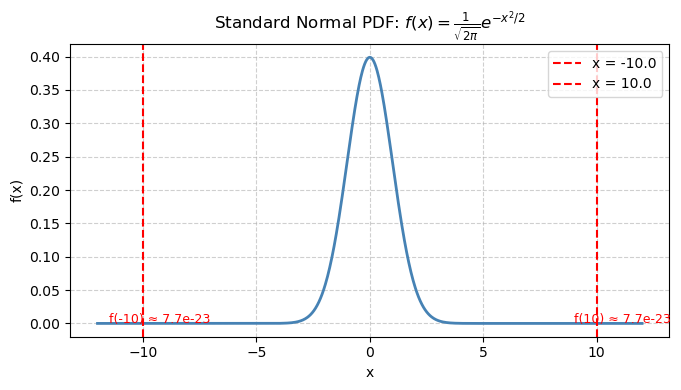

In [2]:
# Plot over [-12, 12] to show tails
x = np.linspace(-12, 12, 1000)
y = f(x)

plt.figure(figsize=(7, 4))
plt.plot(x, y, color='steelblue', linewidth=2)
plt.axvline(-L, color='red', linestyle='--', label=f'x = -{L}')
plt.axvline(L, color='red', linestyle='--', label=f'x = {L}')

# Annotate values at ±10
val_L = f(L)
plt.text(-11.5, val_L, f"f(-10) ≈ {val_L:.1e}", fontsize=9, color='red')
plt.text(9, val_L, f"f(10) ≈ {val_L:.1e}", fontsize=9, color='red')

plt.title(r'Standard Normal PDF: $f(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

### 🔌 Import General Integration Algorithms

With the domain justified as $[-10, 10]$, we now apply numerical quadrature.

We use the reusable `integration.py` module with:
- `midpoint(f, a, b, n)`
- `trapezoidal(f, a, b, n)`
- `simpson(f, a, b, n)`

All methods use exactly $ n $ function evaluations, where $ n = 2^k + 1 $.

In [3]:
from integration import midpoint, trapezoidal, simpson

# Refinement levels: k = 1 to 12 → n = 2^k + 1
k_vals = np.arange(1, 13)          # [1, 2, ..., 12]
n_vals = 2**k_vals + 1             # [3, 5, 9, ..., 4097] (integers), n_vals -1 is equal to number of intervals.

### 📊 Compute Numerical Errors

For each $ n $, we:
1. Approximate $ \int_{-10}^{10} f(x) \, dx $
2. Compute absolute error: $ |\text{approx} - 1| $

The truncation error is negligible, so all error comes from the quadrature rule.

In [4]:
# Store errors
errors = {'mid': [], 'trap': [], 'simp': []}

for num_points in n_vals:
    errors['mid'].append(abs(midpoint(f, a, b, num_points)     - exact))
    errors['trap'].append(abs(trapezoidal(f, a, b, num_points) - exact))
    errors['simp'].append(abs(simpson(f, a, b, num_points)     - exact))

### 📋 Error Table: $ n = 2^k + 1 $

> 💡 The integrand is smooth and symmetric, so **Simpson’s rule converges extremely fast**.

In [5]:
print(f"{'k':>2} {'n':>6} {'Midpoint':>12} {'Trapezoidal':>12} {'Simpson':>12}")
print("-" * 52)
for i, k in enumerate(k_vals):
    n = n_vals[i]
    print(f"{k:2d} {n:6d} {errors['mid'][i]:12.2e} "
          f"{errors['trap'][i]:12.2e} {errors['simp'][i]:12.2e}")

 k      n     Midpoint  Trapezoidal      Simpson
----------------------------------------------------
 1      3     1.66e+00     2.99e+00     4.32e+00
 2      5     5.97e-01     9.95e-01     3.30e-01
 3      9     3.67e-02     8.50e-02     2.18e-01
 4     17     1.28e-06     6.52e-06     2.83e-02
 5     33     4.44e-16     0.00e+00     2.17e-06
 6     65     2.22e-16     2.22e-16     2.22e-16
 7    129     2.22e-16     2.22e-16     2.22e-16
 8    257     3.33e-16     0.00e+00     0.00e+00
 9    513     8.88e-16     2.22e-16     4.44e-16
10   1025     6.66e-16     6.66e-16     4.44e-16
11   2049     2.22e-16     3.33e-16     6.66e-16
12   4097     2.22e-16     1.11e-16     1.11e-15


## 🔍 What Do We Learn?

- ✅ **Truncation to $[-10, 10]$** is fully justified—tail area is negligible.
- 🚀 **Simpson’s rule** reaches machine precision by $ n \approx 129 $.
- ↔️ **Midpoint and Trapezoidal** show clean 2nd-order convergence.
- 🧠 This is an **ideal test case**: smooth, symmetric, well-behaved.

> This shows how numerical integration handles "infinite" domains when the integrand has **exponential decay**.

### 📈 Convergence Plot (Log-Log Scale)

On a log-log plot, the **slope** of the error curve tells us the **order of convergence**:

- A slope of **–2** means error ≈ $ C / n^2 $ → **2nd-order** (Midpoint & Trapezoidal)
- A slope of **–4** means error ≈ $ C / n^4 $ → **4th-order** (Simpson)

To help you **see these slopes**, we add two **reference lines**:
- A dashed gray line for $ \mathcal{O}(n^{-2}) $
- A dotted black line for $ \mathcal{O}(n^{-4}) $

These lines are **anchored to your actual error data**, so they show not just the *slope* but also the correct *scale*.  
If your method’s error follows the reference line, it confirms the expected convergence rate!

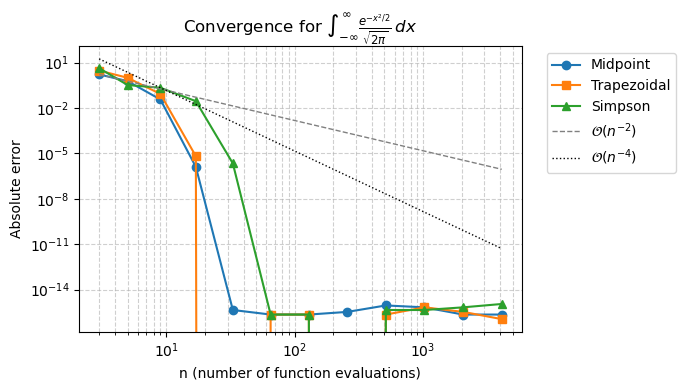

In [6]:
# Convert n to float to allow negative powers (needed for n^(-2), n^(-4))
n_float = n_vals.astype(float)

# Create the plot
plt.figure(figsize=(7, 4))
plt.loglog(n_vals, errors['mid'],  'o-', label='Midpoint')
plt.loglog(n_vals, errors['trap'], 's-', label='Trapezoidal')
plt.loglog(n_vals, errors['simp'], '^-', label='Simpson')

# --- Add reference lines for theoretical convergence rates ---

# For 2nd-order methods (Midpoint/Trapezoidal):
#   We assume error ≈ C2 / n^2.
#   Estimate C2 using the first Midpoint error (at n = n_vals[0]).
C2 = errors['mid'][0] * (n_vals[0] ** 2)
ref_2nd = C2 * n_float**(-2)

# For 4th-order Simpson's rule:
#   We assume error ≈ C4 / n^4.
#   Use the 3rd data point (n_vals[2]) to avoid noisy coarse-grid errors.
C4 = errors['simp'][2] * (n_vals[2] ** 4)
ref_4th = C4 * n_float**(-4)

plt.loglog(n_float, ref_2nd, '--', color='gray', linewidth=1, label=r'$\mathcal{O}(n^{-2})$')
plt.loglog(n_float, ref_4th, ':', color='black', linewidth=1, label=r'$\mathcal{O}(n^{-4})$')

# Labels and layout
plt.xlabel('n (number of function evaluations)')
plt.ylabel('Absolute error')
plt.title(r'Convergence for $\int_{-\infty}^{\infty} \frac{e^{-x^2/2}}{\sqrt{2\pi}}\,dx$')
plt.grid(True, which='both', linestyle='--', alpha=0.6)

# Legend outside the plot (to avoid covering data)
plt.legend(bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()
plt.show()